<a href="https://colab.research.google.com/github/Reconocimiento-de-patrones-UNQ/Clase1/blob/main/viernes30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clase Teórica: Reconocimiento de Patrones (Pattern Recognition)

🎯 Objetivos

    Comprender qué es el reconocimiento de patrones y por qué es importante.

    Conocer los conceptos básicos: patrón, clase, características, clasificación, agrupamiento.

    Diferenciar entre aprendizaje supervisado y no supervisado.

    Ver ejemplos con datos

1. ¿Qué es el Reconocimiento de Patrones?

El reconocimiento de patrones es la habilidad de identificar, comprender y utilizar patrones en información o en nuestro entorno. Se refiere a la capacidad de vincular los detalles de nuestro entorno actual con información almacenada en la memoria a largo plazo. En el contexto de la inteligencia artificial, se refiere a la capacidad de las máquinas para identificar y clasificar patrones en datos, imitando la capacidad humana de reconocer y procesar información

Se usa en:

    Diagnóstico médico

    Reconocimiento de voz o imágenes

    Neurociencia (por ejemplo, para distinguir tipos de respuestas neuronales)

    Ciencia de datos y comportamiento

2. Conceptos básicos

    Pattern (patrón): objeto de análisis (imagen, vector de medidas, señal).

    Class (clase): categoría posible (Ej: perro, gato, sano, enfermo).

    Feature (característica): propiedad medible (Ej: color, frecuencia, peso).

    Feature vector (vector de características): conjunto de características que describen un patrón.



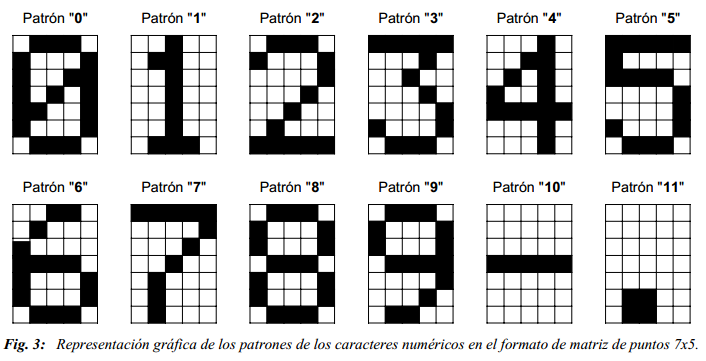

Los datos se formatean de forma tal que en cada fila haya un vectores de características, estos puede ser:

Muestras (samples): término general para referirse a los datos individuales.

Instancias (instances): se usa en aprendizaje automático para referirse a cada fila o punto de datos.

Ejemplos (examples): especialmente en contextos educativos o de aprendizaje supervisado.

Observaciones (observations): en estadística y análisis de datos.

Patrones (patterns): a veces se usa este término para referirse directamente a los ejemplos con características que se deben reconocer.

En bioinformática y biología computacional:

Sujetos (subjects): el término más habitual en estudios clínicos, experimentales o de neuroimagen.

Pacientes (patients): si están siendo tratados o diagnosticados.

Individuos (individuals): término más neutral, usado en estudios poblacionales.

Participantes (participants): enfatiza que se trata de personas que voluntariamente forman parte del estudio.

Animales de experimentación (experimental animals): si se trata de modelos animales.

Lecturas (reads): en secuenciación masiva (NGS), cada fragmento de ADN/ARN secuenciado.

Genes o transcritos: si se están clasificando o agrupando por expresión.



| Tipo de tarea                    | Supervisión                                   | Tipo de variable dependiente                                     | Ejemplo                                            |
| -------------------------------- | --------------------------------------------- | ---------------------------------------------------------------- | -------------------------------------------------- |
| **Clasificación**                | Supervisado                                   | Categórica (discreta)                                            | Diagnóstico: sano / enfermo                        |
| **Regresión**                    | Supervisado                                   | Numérica (continua)                                              | Predecir edad a partir de características faciales |
| **Clustering**                   | No supervisado                                | No hay variable dependiente conocida (se infiere una estructura) | Agrupar patrones de disparo neuronal similares     |
| **Reducción de dimensionalidad** | No supervisado                                | No hay variable dependiente                                      | PCA, t-SNE para visualizar datos en 2D             |
| **Series temporales**            | Supervisado (usualmente)                      | Numérica o categórica a lo largo del tiempo                      | Predecir tasa de disparo en función del tiempo     |
| **Aprendizaje por refuerzo**     | Semi-supervisado (interacción con el entorno) | Recompensa (numérica) acumulada                                  | Optimizar la estrategia de un agente en un entorno |



Fases de un Sistema de Pattern Recognition

    Adquisición de datos (Ej: grabar sonidos o registrar disparos neuronales)

    Preprocesamiento (limpieza de ruido, normalización)

    Extracción de características (frecuencia dominante, tasa de disparo, etc.)

    Selección del modelo (clasificador o algoritmo de agrupamiento)

    Entrenamiento y validación (solo si hay etiquetas)

    Predicción o interpretación



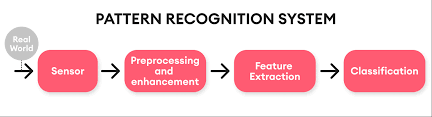

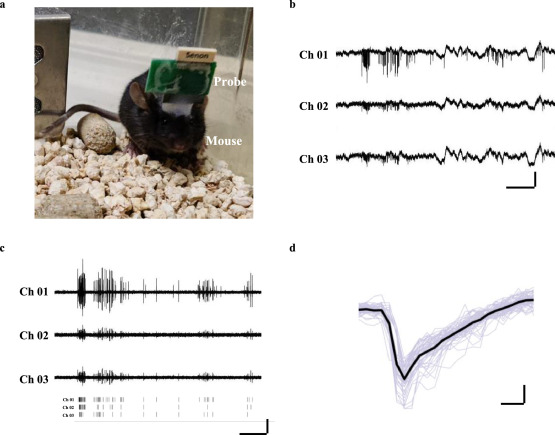

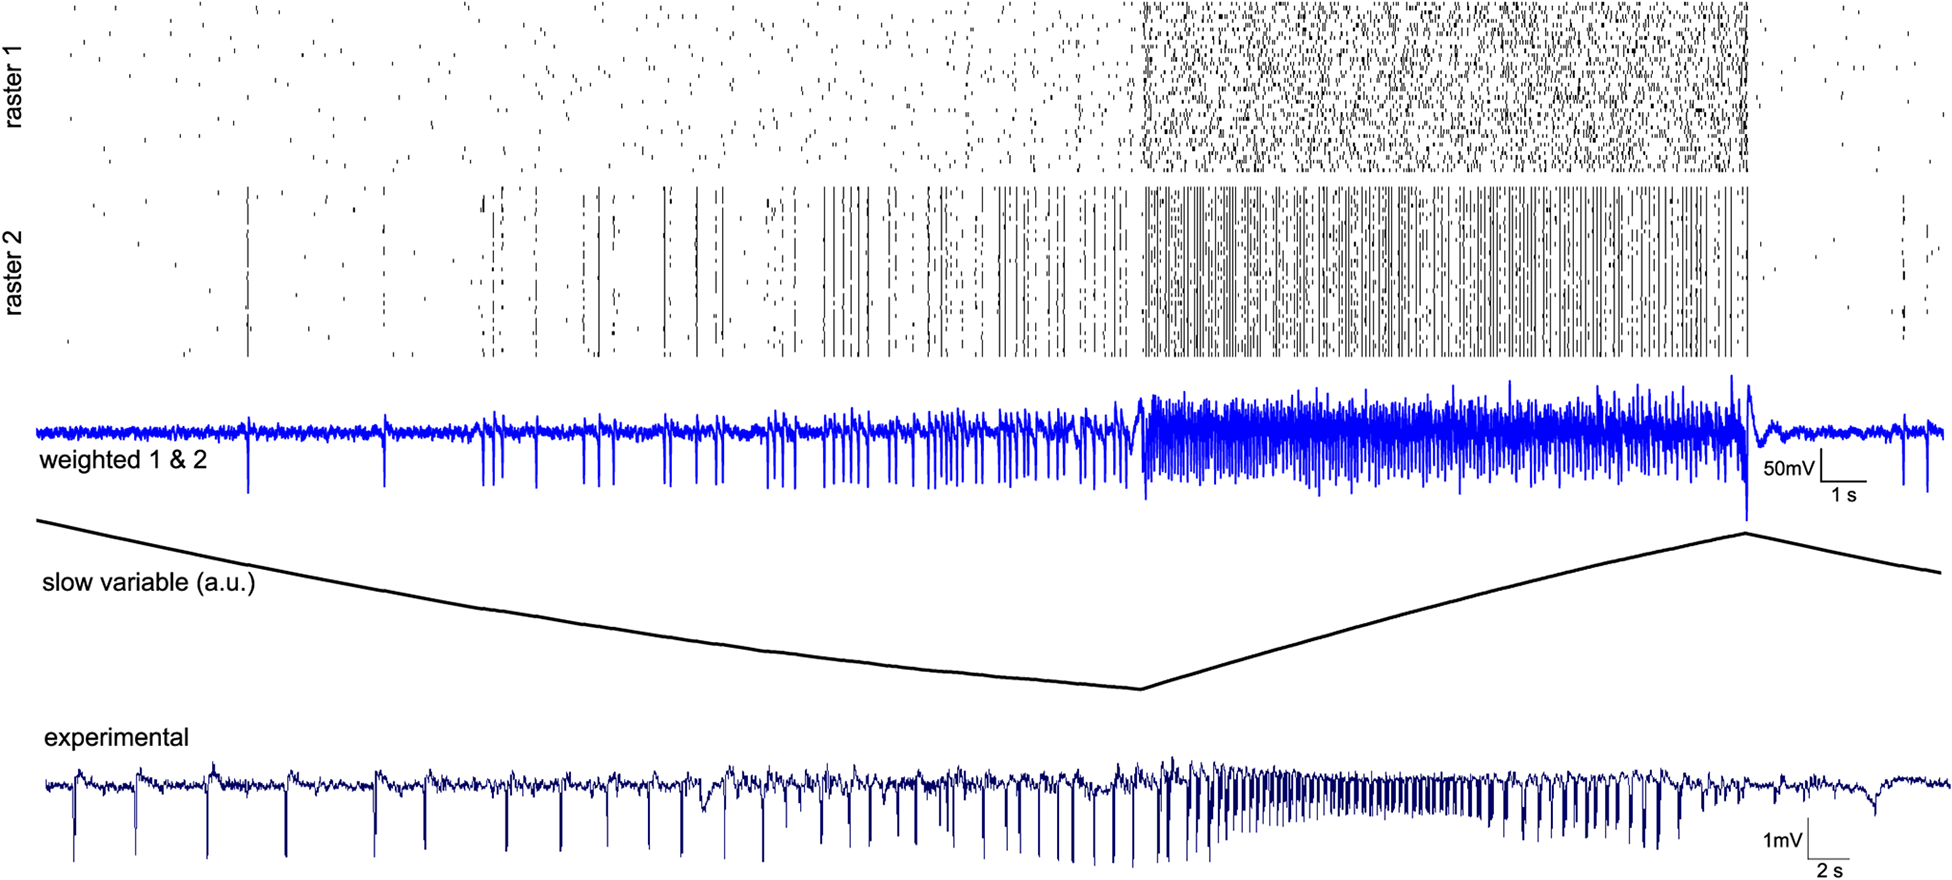

doi: https://doi.org/10.1371/journal.pcbi.1004209.g006

Ejemplo 1: Clasificación (Supervised Learning)

Problema:
Queremos predecir a qué especie pertenece una flor de iris en función de sus características morfológicas.

Datos de entrenamiento:
Se utiliza el famoso dataset Iris de Fisher, que contiene mediciones de 150 flores de tres especies diferentes: setosa, versicolor y virginica. Las características son:

    Largo del sépalo (cm)

    Ancho del sépalo (cm)

    Largo del pétalo (cm)

    Ancho del pétalo (cm)

    Especie (clase a predecir)

Supongamos que quiero que una maquina clasifique automáticamente un nuevo ejemplar con las siguientes características:

    Largo del sépalo = 5.1 cm

    Ancho del sépalo = 3.5 cm

    Largo del pétalo = 1.4 cm

    Ancho del pétalo = 0.2 cm

¿A qué especie pertenece?





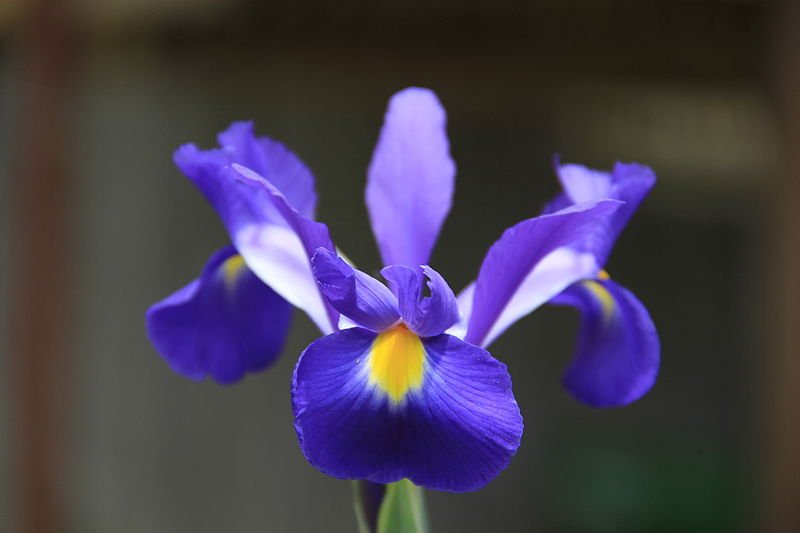

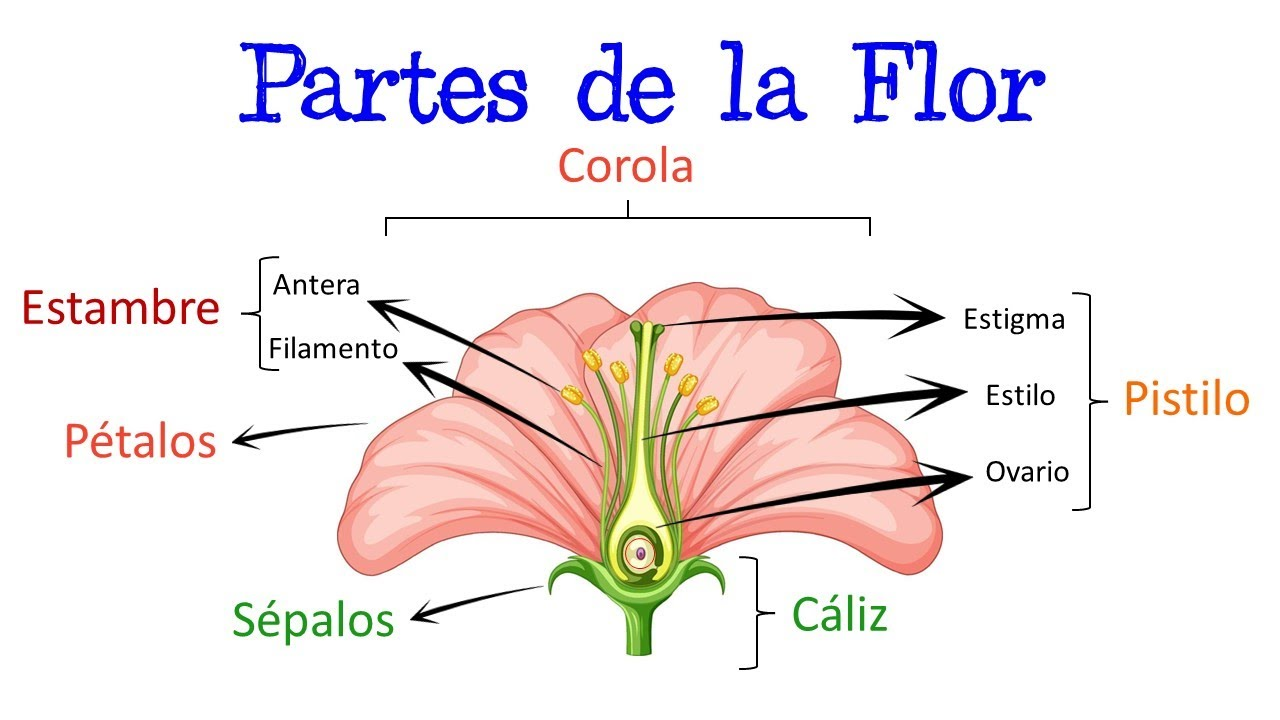

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

# Cargar el dataset Iris
iris = load_iris()

# Convertir a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[i] for i in iris.target]

# Mostrar las primeras filas
print(df.sample(5))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
59                 5.2               2.7                3.9               1.4   
64                 5.6               2.9                3.6               1.3   
139                6.9               3.1                5.4               2.1   
39                 5.1               3.4                1.5               0.2   
67                 5.8               2.7                4.1               1.0   

        species  
59   versicolor  
64   versicolor  
139   virginica  
39       setosa  
67   versicolor  


##Ejemplo 2: Agrupamiento (Unsupervised Learning)
Problema

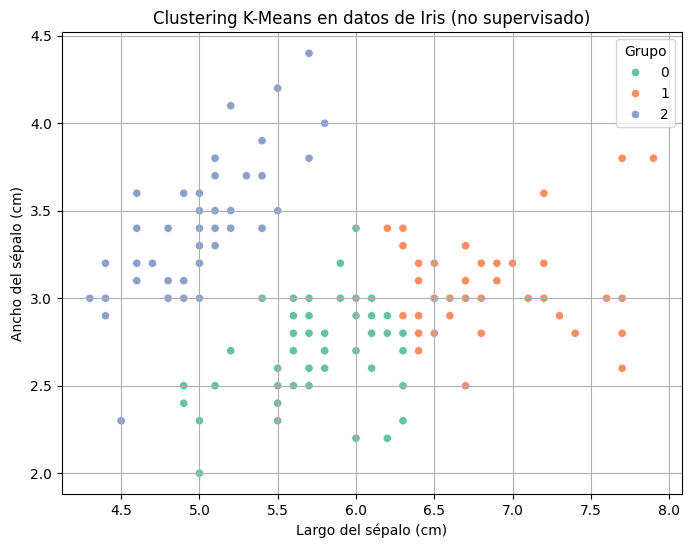

Matriz de contingencia:
species  setosa  versicolor  virginica
cluster                               
0             0          38         15
1             0          12         35
2            50           0          0

Precisión aproximada del clustering: 82.00%


In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Cargamos el dataset iris
iris = sns.load_dataset('iris')
X = iris[['sepal_length', 'sepal_width']]# solo usamos 'sepal_length' (largo del sépalo),'sepal_width' (ancho del sépalo)

# Ajustamos KMeans con 3 grupos (como si no supiéramos las especies reales)
kmeans = KMeans(n_clusters=3, random_state=0)
iris['cluster'] = kmeans.fit_predict(X)

# Visualizamos los clusters hallados
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='cluster', palette='Set2')
plt.title('Clustering K-Means en datos de Iris (no supervisado)')
plt.xlabel('Largo del sépalo (cm)')
plt.ylabel('Ancho del sépalo (cm)')
plt.legend(title='Grupo')
plt.grid(True)
plt.show()
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import numpy as np

# Matriz de contingencia
contingency_table = pd.crosstab(iris['cluster'], iris['species'])
print("Matriz de contingencia:")
print(contingency_table)

# Asignar cada cluster a la especie más frecuente dentro de ese cluster
mapping = {}

for cluster in contingency_table.index:
    most_common_species = contingency_table.loc[cluster].idxmax()
    mapping[cluster] = most_common_species

# Mapear los clusters a las etiquetas estimadas
iris['predicted_species'] = iris['cluster'].map(mapping)

# Calcular precisión
accuracy = accuracy_score(iris['species'], iris['predicted_species'])
print(f"\nPrecisión aproximada del clustering: {accuracy:.2%}")

¿Cómo se relaciona con las regresiones multivariadas?

Las regresiones multivariadas (como la regresión lineal múltiple, logística múltiple o modelos más complejos como glm, etc.) son modelos estadísticos que buscan:

    Predecir una variable (respuesta) a partir de varias variables independientes.


*   Toda regresión multivariada supervisada puede formar parte de un sistema de
reconocimiento de patrones. Pero no todo reconocimiento de patrones usa regresión; puede usar técnicas no paramétricas, redes neuronales, árboles, etc.


*   En el contexto de reconocimiento de patrones, machine learning, y
bioinformática, los features (características) son equivalentes a las dimensiones del espacio en el que se representan los datos.

##Problemas comunes


✅ 1. Overfitting (sobreajuste)

    Qué es: Cuando el modelo se ajusta demasiado bien a los datos de entrenamiento, incluyendo el ruido.

    Consecuencia: Rinde mal con nuevos datos (generalización pobre).

    Soluciones: regularización, validación cruzada, limitar la complejidad del modelo.

    🎓 Ejemplo: un árbol de decisión que memoriza los datos, pero falla con nuevos pacientes.

✅ 2. Data leakage (fugas de datos)

    Qué es: Cuando entra información del futuro (por ejemplo, del conjunto de prueba) durante el entrenamiento del modelo.

    Consecuencia: el modelo parece muy bueno pero no lo es.

    Ejemplos comunes:

        Escalar los datos antes de hacer la división train/test.*

        Usar variables derivadas de la respuesta.

    🔥 Muy importante en estudios biomédicos y de expresión génica.

   *Cuando escalás todos los datos juntos (antes de dividir), calculás estadísticas como la media y la desviación estándar (en el caso del escalado estándar) usando tanto los datos de entrenamiento como los de prueba. Esto hace que el modelo, durante el entrenamiento, tenga acceso a información que no debería tener. El escalado estándar (también llamado normalización z-score) transforma los datos restando la media y dividiendo por la desviación estándar de cada variable

Esto viola el principio de generalización, porque el modelo está siendo entrenado con una transformación influenciada por el test, lo que puede llevar a un rendimiento artificialmente alto en la evaluación.

✅ 3. High dimensionality / curse of dimensionality

    Qué es: Tener más variables que observaciones o muchas variables irrelevantes.

    Consecuencia: el espacio se vuelve esparcido, los modelos se vuelven inestables.

    Solución: reducción de dimensionalidad (PCA, selección de variables).
En modelos estadísticos y de machine learning, los grados de libertad (df) reflejan cuánta información "libre" hay para estimar parámetros sin sobreajustar. Si el número de variables se acerca o supera el número de observaciones, los grados de libertad efectivos se reducen.
Podés ajustar casi cualquier cosa, porque tenés más parámetros que datos.
Esto lleva a sobreajuste extremo: el modelo memoriza todo, pero no generaliza.

✅ 4. Imbalanced data (clases desbalanceadas)

    Qué es: una clase es mucho más frecuente que la otra.

    Consecuencia: un modelo puede acertar el 95% del tiempo simplemente prediciendo siempre la clase mayoritaria.

    Soluciones: reponderar clases, sobremuestreo, undersampling.

✅ 5. Confusión entre ajuste y predicción

    Muchos estudiantes creen que un buen ajuste implica buena predicción → falso.

    Tenés que mostrar la importancia de evaluar con datos que el modelo no vio.

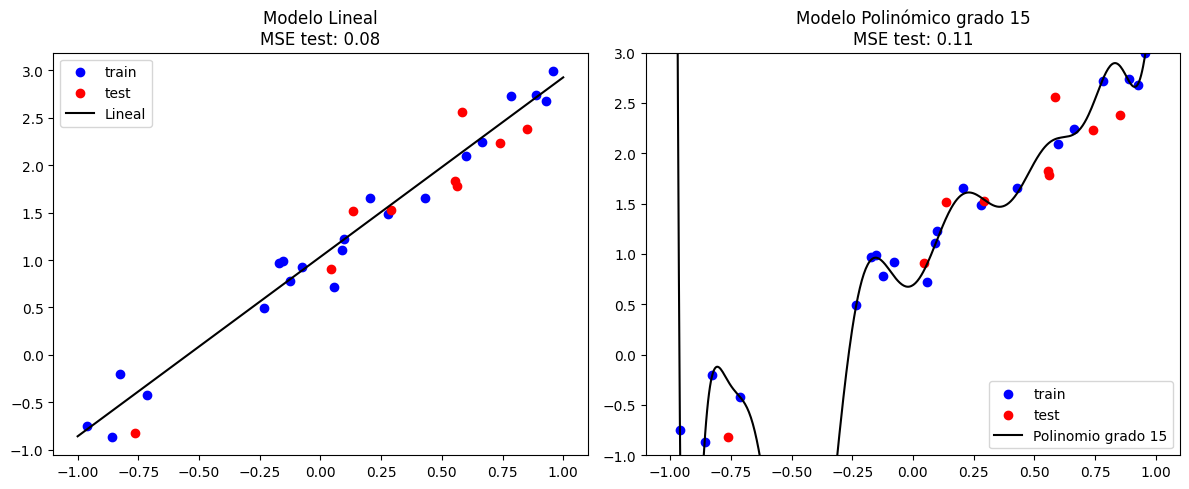

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Generar datos lineales con ruido
np.random.seed(0)
n = 30
X = np.sort(np.random.rand(n) * 2 - 1).reshape(-1, 1)  # valores entre -1 y 1
y = 2 * X.squeeze() + 1 + np.random.normal(0, 0.2, n)  # y = 2x + 1 + ruido

# 2. Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# 3. Modelos
model_lineal = LinearRegression()
model_poli15 = make_pipeline(PolynomialFeatures(degree=15), LinearRegression())

model_lineal.fit(X_train, y_train)
model_poli15.fit(X_train, y_train)

# 4. Predicciones
x_plot = np.linspace(-1, 1, 500).reshape(-1, 1)
y_pred_lineal = model_lineal.predict(x_plot)
y_pred_poli15 = model_poli15.predict(x_plot)

# 5. Errores
mse_lineal = mean_squared_error(y_test, model_lineal.predict(X_test))
mse_poli15 = mean_squared_error(y_test, model_poli15.predict(X_test))

# 6. Graficar
plt.figure(figsize=(12, 5))

# Lineal
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label="train", color="blue")
plt.scatter(X_test, y_test, label="test", color="red")
plt.plot(x_plot, y_pred_lineal, color="black", label="Lineal")
plt.title(f"Modelo Lineal\nMSE test: {mse_lineal:.2f}")
plt.legend()

# Polinómico
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, label="train", color="blue")
plt.scatter(X_test, y_test, label="test", color="red")
plt.plot(x_plot, y_pred_poli15, color="black", label="Polinomio grado 15")
plt.title(f"Modelo Polinómico grado 15\nMSE test: {mse_poli15:.2f}")
plt.legend()
plt.ylim(-1,3)
plt.tight_layout()
plt.show()



##Tarea para el hogar


# La Simulación de Montecarlo

## Objetivo general

Comprender los principios de la simulación de Montecarlo como método para resolver problemas complejos mediante el muestreo aleatorio, y aplicarla a ejemplos prácticos.

---

## Parte 1: ¿Qué es la Simulación de Montecarlo?

**Definición breve:**

> La simulación de Montecarlo es una técnica que utiliza números aleatorios para aproximar soluciones a problemas matemáticos o computacionales complejos.

### Características clave:

* Requiere una fuente de aleatoriedad (distribuciones conocidas o procesos estocásticos).
* Se basa en la repetición de experimentos simulados.
* Proporciona soluciones aproximadas que convergen al valor real con suficiente número de iteraciones.


Ejemplo: ray tracing usa Monte Carlo cuando se busca un realismo físico alto

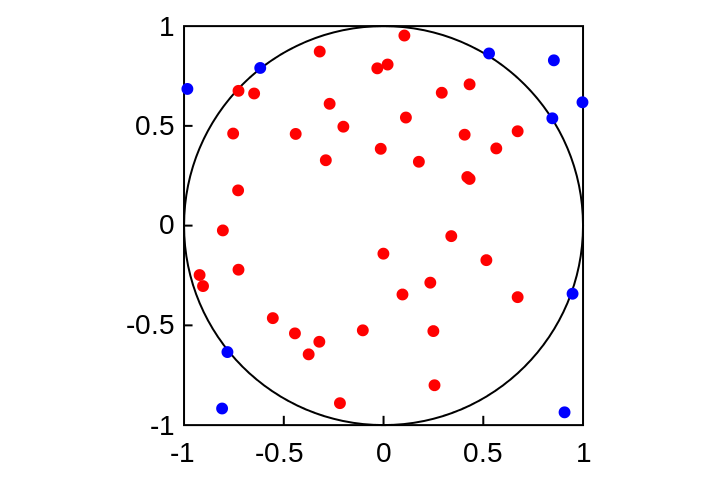

##Parte 2: Ejemplo clásico - Estimación de π

Problema: Estimar el valor de π usando puntos aleatorios en un cuadrado de lado 2

    Área del cuadrado: 2*2
    Área del círculo: π

La probabilidad de que un punto aleatorio dentro del cuadrado caiga dentro del círculo es: π/4

Por lo tanto, si generamos muchos puntos aleatorios y calculamos la proporción que cae dentro del círculo, podemos estimar π.

Código en Python:

[False  True  True  True  True  True False  True  True False  True  True
 False False  True False  True  True False  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True False  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True False
 False False  True  True  True  True False  True  True  True  True False
  True  True  True  True]
Estimación de pi: 3.28000


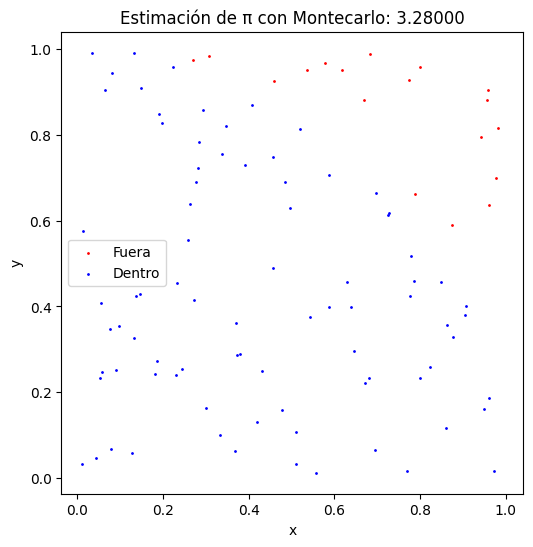

In [14]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
x = np.random.rand(N)# Números aleatorios entre 0 y 1 (simulan puntos en el primer cuadrante)
y = np.random.rand(N)
inside = x**2 + y**2 <= 1# Todos los puntos que están a una distancia igual a 1 del origen (es decir, que cumplen x2+y2=1) forman un círculo de radio 1.
print (inside)
pi_estimate = 4 * np.sum(inside) / N
print(f"Estimación de pi: {pi_estimate:.5f}")

plt.figure(figsize=(6, 6))
plt.scatter(x[~inside], y[~inside], color='red', s=1, label='Fuera')
plt.scatter(x[inside], y[inside], color='blue', s=1, label='Dentro')
plt.legend()
plt.title(f"Estimación de π con Montecarlo: {pi_estimate:.5f}")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('square')
plt.show()


---

## Parte 3: Aplicaciones en biología computacional

### Ejemplos:

* Simulación de trayectorias moleculares (dinámica molecular y protein folding).
* Estimación de valores p mediante permutaciones aleatorias (test de permutación).
* Modelado de procesos estocásticos (e.g. mutaciones, drift genético).
* Evaluación de incertidumbre en modelos de expresión génica.

---

## Parte 4, Actividad:



🔬 Contexto biológico:

Motivos como la TATA box (por ejemplo, TATAAA) aparecen en regiones promotoras y son reconocidos por factores de transcripción. En algunos contextos genómicos, uno podría preguntarse:

    ¿Qué tan probable es que se observe de novo un motivo como una TATA box en una muestra de ADN aleatorio?

🧪 Hipótesis:

  Incluso en ausencia de selección, por puro azar, ciertos motivos podrían aparecer en múltiples lugares, lo que puede llevar a falsas inferencias de función si no se controla por esta expectativa.


##Tarea:  Estimar la probabilidad de que, en un grupo de regiones de ADN generadas al azar, se genere un motivo funcional de tipo "TATA box" por azar, sin presión selectiva ni mecanismos funcionales.

*   Hacerlo para 1000 pares de bases
*   Hacerlo para 10000 pares de bases


🛠️ Implementación sugerida:

    Definir un conjunto de motivos reales (por ejemplo: TATAAA, CCAAT, GC-rich motifs).

    Generar muchas secuencias de ADN aleatorias.

    Verificar si alguno de estos motivos aparece en esas secuencias.

    Repetir muchas simulaciones (Montecarlo).

    Estimar la probabilidad de coincidencia de novo.

* https://youtu.be/m4X94Sq1Q4M?si=vWiLqasb6lCRxLkq
* Librerías: `numpy`, `matplotlib`, `scipy.stats`, `simpy`, `joblib` (paralelizar simulaciones)
